In [1]:
import yfinance as yf
import pandas as pd

In [2]:
import yfinance as yf

# Fetch Microsoft (MSFT) stock data
msft = yf.download("MSFT", start="1986-03-13", end="2025-02-01")

# Reset index to make 'Date' a column
msft.reset_index(inplace=True)

# Rename columns to match expected output
msft.rename(columns={'Adj Close': 'Adj Close'}, inplace=True)

# Display formatted data
print(msft.head())


[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open      Volume
Ticker                 MSFT      MSFT      MSFT      MSFT        MSFT
0      1986-03-13  0.059827  0.062498  0.054485  0.054485  1031788800
1      1986-03-14  0.061963  0.063032  0.059827  0.059827   308160000
2      1986-03-17  0.063032  0.063566  0.061963  0.061963   133171200
3      1986-03-18  0.061429  0.063566  0.060895  0.063032    67766400
4      1986-03-19  0.060361  0.061963  0.059827  0.061429    47894400


In [3]:
df=pd.DataFrame(msft)

In [4]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,1986-03-13,0.059827,0.062498,0.054485,0.054485,1031788800
1,1986-03-14,0.061963,0.063032,0.059827,0.059827,308160000
2,1986-03-17,0.063032,0.063566,0.061963,0.061963,133171200
3,1986-03-18,0.061429,0.063566,0.060895,0.063032,67766400
4,1986-03-19,0.060361,0.061963,0.059827,0.061429,47894400


In [5]:
df = df[['Date', 'Close']]

df

Price,Date,Close
Ticker,,MSFT
0,1986-03-13,0.059827
1,1986-03-14,0.061963
2,1986-03-17,0.063032
3,1986-03-18,0.061429
4,1986-03-19,0.060361
...,...,...
9794,2025-01-27,434.559998
9795,2025-01-28,447.200012
9796,2025-01-29,442.329987


In [6]:
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9794   2025-01-27
9795   2025-01-28
9796   2025-01-29
9797   2025-01-30
9798   2025-01-31
Name: Date, Length: 9799, dtype: datetime64[ns]

In [7]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [8]:
df

Price,Date,Close
Ticker,,MSFT
0,1986-03-13,0.059827
1,1986-03-14,0.061963
2,1986-03-17,0.063032
3,1986-03-18,0.061429
4,1986-03-19,0.060361
...,...,...
9794,2025-01-27,434.559998
9795,2025-01-28,447.200012
9796,2025-01-29,442.329987


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9794   2025-01-27
9795   2025-01-28
9796   2025-01-29
9797   2025-01-30
9798   2025-01-31
Name: Date, Length: 9799, dtype: datetime64[ns]

In [13]:
df.index = df.pop('Date')
df

Price,Close
Ticker,MSFT
Date,
1986-03-13,0.059827
1986-03-14,0.061963
1986-03-17,0.063032
1986-03-18,0.061429
1986-03-19,0.060361
...,...
2025-01-27,434.559998
2025-01-28,447.200012


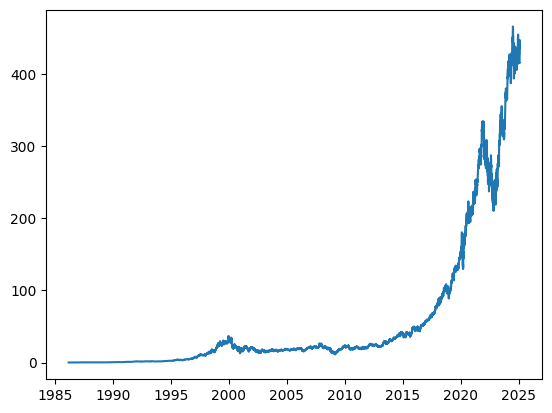

In [14]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [15]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,228.637589,230.178040,228.124115,[225.101318359375]
1,2021-03-26,230.178040,228.124115,225.101318,[229.11231994628906]
2,2021-03-29,228.124115,225.101318,229.112320,[227.9109344482422]
3,2021-03-30,225.101318,229.112320,227.910934,[224.62657165527344]
4,2021-03-31,229.112320,227.910934,224.626572,[228.4244384765625]
...,...,...,...,...,...
247,2022-03-17,270.008850,280.469727,287.541351,[288.35198974609375]
248,2022-03-18,280.469727,287.541351,288.351990,[293.4407958984375]
249,2022-03-21,287.541351,288.351990,293.440796,[292.2003479003906]
250,2022-03-22,288.351990,293.440796,292.200348,[296.9863586425781]


In [16]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5916\3836700885.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return dates, X.astype(np.float32), Y.astype(np.float32)


((252,), (252, 3, 1), (252,))

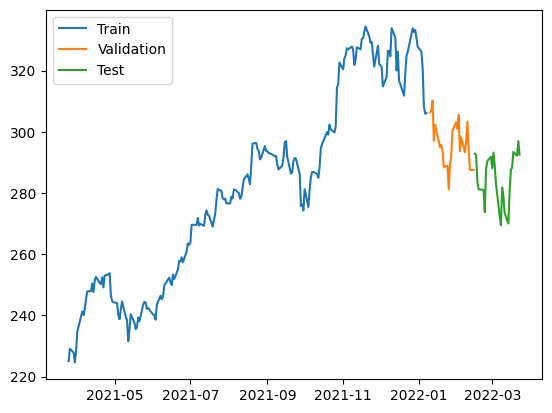

In [17]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 80130.7578 - mean_absolute_error: 281.1964 - val_loss: 87254.8984 - val_mean_absolute_error: 295.3042
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 79625.8750 - mean_absolute_error: 280.3535 - val_loss: 86974.3516 - val_mean_absolute_error: 294.8288
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 78895.4688 - mean_absolute_error: 279.1085 - val_loss: 86637.5078 - val_mean_absolute_error: 294.2570
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 78732.4766 - mean_absolute_error: 278.8018 - val_loss: 86235.2031 - val_mean_absolute_error: 293.5726
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 78939.2031 - mean_absolute_error: 279.2496 - val_loss: 85718.7188 - val_mean_absolute_error: 292.6916
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 77371.8984 - mean_absolute_error: 276.2613 - val_loss: 84974.7500 - val_mean_absolute_error: 291.4179
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


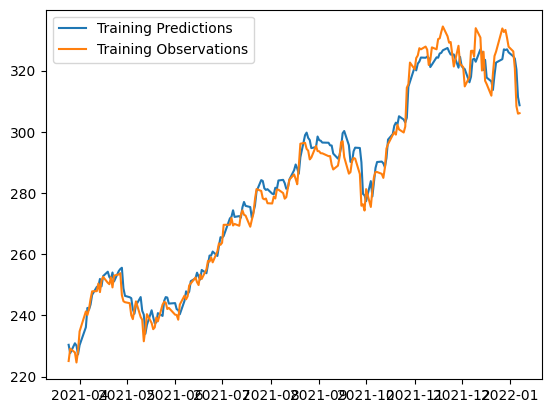

In [19]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


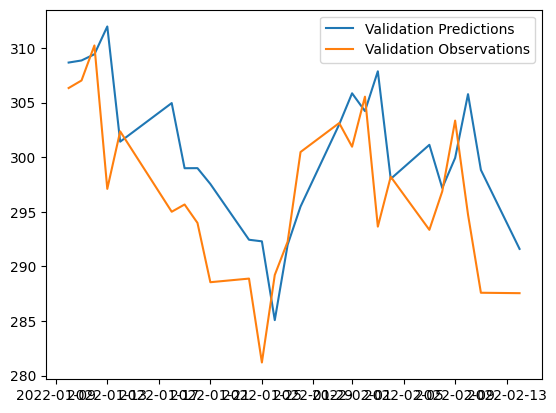

In [20]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


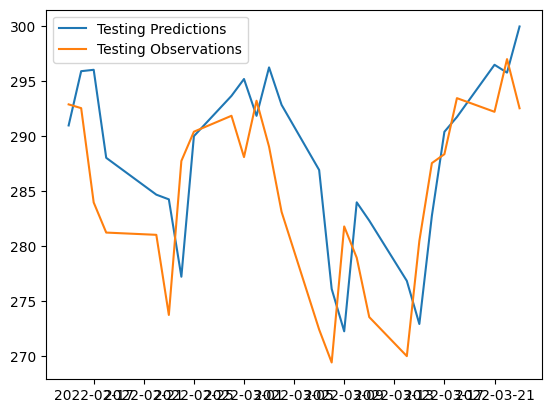

In [21]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

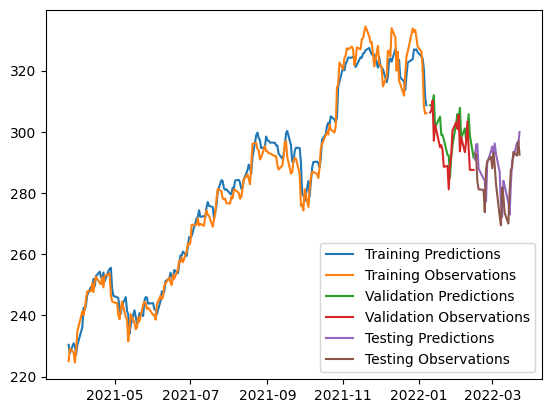

In [22]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [23]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

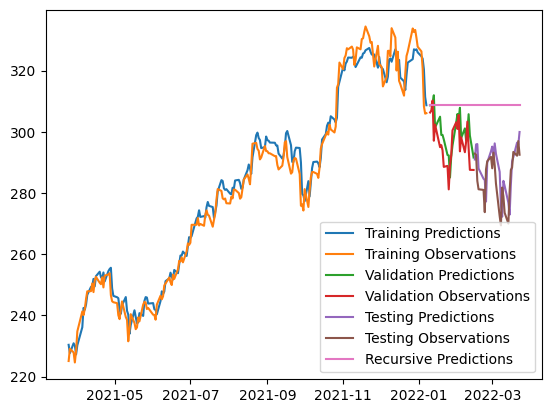

In [24]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])